In [3]:
import numpy as np
import matplotlib.pyplot as plt

The binary sequence of the given signal is:
['11', '10', '1', '0', '0', '1', '10', '11', '11', '10', '1', '0', '0', '1', '10', '11', '10', '1', '0', '0', '1', '10', '11', '11', '10', '1', '0', '0', '1', '10']


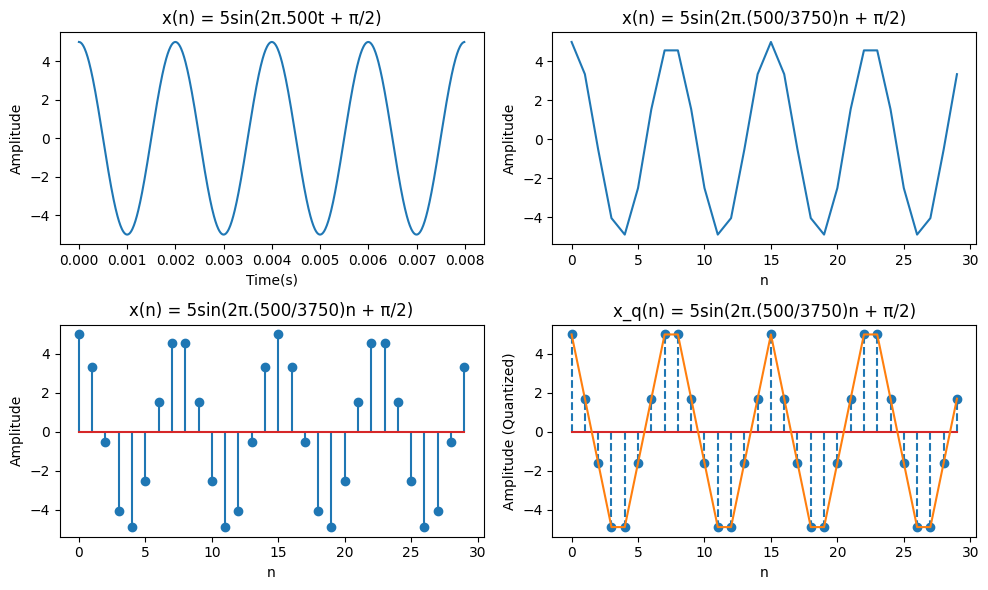

In [ ]:
# ===== CONTINUOUS-TIME SIGNAL =====
# Define time vector (simulating continuous time with very small step)
t = np.arange(0, 0.008, 0.00001)  # Time from 0 to 8ms with 10µs resolution

# Generate continuous sine wave: x(t) = 5sin(2π·500·t + π/2)
# Amplitude = 5, Frequency = 500 Hz, Phase = 90° (π/2 radians)
x = 5 * np.sin(2 * np.pi * 500 * t + np.radians(90))

# Create figure with 4 subplots
plt.figure(figsize=(10, 6))

# Plot 1: Continuous-time signal
plt.subplot(2, 2, 1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Continuous Signal: x(t) = 5sin(2π·500t + π/2)')

# ===== SAMPLING =====
# Sampling frequency fs = 3750 Hz (satisfies Nyquist: fs > 2·500 = 1000 Hz)
fs = 3750
n = np.arange(0, 0.008, 1/fs)  # Discrete time indices

# Sampled signal: x[n] = 5sin(2π·(500/3750)·n + π/2)
x_n = 5 * np.sin(2 * np.pi * 500 * n + np.pi / 2)

# Plot 2: Sampled signal (line plot)
plt.subplot(2, 2, 2)
plt.plot(x_n)
plt.xlabel('n (sample index)')
plt.ylabel('Amplitude')
plt.title(f'Sampled Signal (fs = {fs} Hz)')

# Plot 3: Sampled signal (stem plot)
plt.subplot(2, 2, 3)
plt.stem(x_n)
plt.xlabel('n (sample index)')
plt.ylabel('Amplitude')
plt.title('Discrete Samples (Stem Plot)')

# ===== QUANTIZATION =====
number_of_bits = 2  # Number of bits for quantization
num_levels = 2 ** number_of_bits  # Number of quantization levels = 4

# Find signal range
x_max = np.max(x_n)  # Maximum amplitude
x_min = np.min(x_n)  # Minimum amplitude

# Calculate step size (quantization interval)
# Step size = (max - min) / (number of levels - 1)
step_size = (x_max - x_min) / (num_levels - 1)

# Quantize the signal using mid-tread quantization
# Formula: x_q = round((x - min) / step_size) * step_size + min
x_q = np.round((x_n - x_min) / step_size) * step_size + x_min

# Plot 4: Quantized signal
plt.subplot(2, 2, 4)
plt.stem(x_q, linefmt='--')
plt.plot(x_q)
plt.xlabel('n (sample index)')
plt.ylabel('Amplitude (Quantized)')
plt.title(f'Quantized Signal ({number_of_bits}-bit, {num_levels} levels)')

plt.tight_layout()
plt.show()

# ===== BINARY ENCODING =====
# Convert quantized values to binary representation
print(f'\nQuantization Parameters:')
print(f'  - Number of bits: {number_of_bits}')
print(f'  - Number of levels: {num_levels}')
print(f'  - Step size: {step_size:.4f}')
print(f'  - Signal range: [{x_min:.4f}, {x_max:.4f}]')

print(f'\nBinary encoding of quantized samples:')
x_binary = []
for i, val in enumerate(x_q):
    # Calculate quantization level index (0 to num_levels-1)
    level = int(np.round((val - x_min) / step_size))
    # Convert to binary with zero-padding to number_of_bits
    binary_str = format(level, f'0{number_of_bits}b')
    x_binary.append(binary_str)
    print(f'  x_q[{i:2d}] = {val:7.4f} → Level {level} → {binary_str}')

print(f'\nBinary sequence: {x_binary}')